<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

# Reads the CSV file, then prints the content
df = pd.read_csv('https://raw.githubusercontent.com/jholliday55/jholliday-ADVDS/main/forestfires.csv')

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
# Gives the size of the dataset
df.shape

(517, 13)

In [ ]:
# Describes the dataset and provides stats of the dataset
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


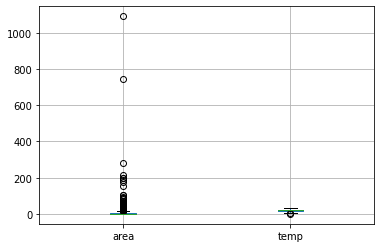

In [ ]:
df.boxplot(column=['area', 'temp'])

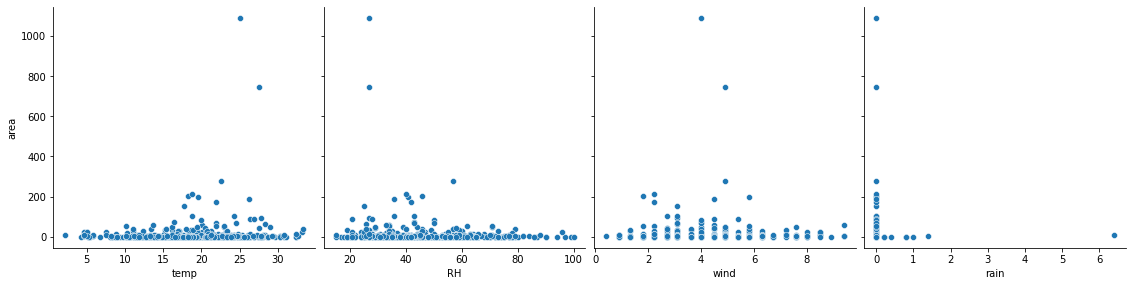

In [ ]:
# Shows scatterplot of the four attributes are are comparing to area burned down
sbn.pairplot(df, x_vars=['temp', 'RH', 'wind', 'rain'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
import numpy as np
from sklearn import linear_model
lm = linear_model.LinearRegression()
# The area data is highly skewed
# We use log transofrmation to make data more linear
# Performs log transofmation on the attribute area.
correct_area = pd.DataFrame(df['area'])
df['correct_area'] = np.log10(correct_area + 1)

# Reshape by adding an extra column.
x = df['temp'].values.reshape(-1,1)
y = df['correct_area'].values.reshape(-1,1)

# Fits the model by using fit method
lm.fit(x, y)

# Gets the interscept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.3768402195781929, 0.0055943246406643336)

**Linear Model:** Area = 0.37684 + 0.0059*temp

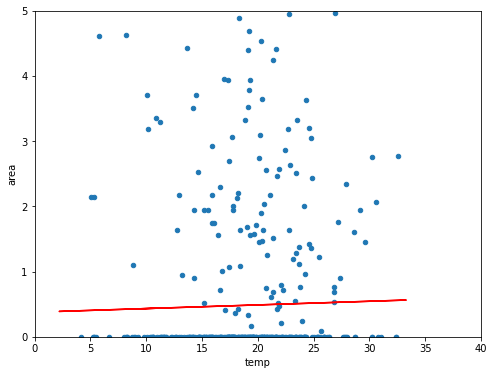

In [ ]:
# Plots the linear model on scatter plot
df.plot(kind='scatter', x='temp', y='area', figsize=(8, 6))

plt.axis([0, 40, 0, 5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [ ]:
# We split the data into training and testing sets using the 80-20 holdout technique

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [ ]:
# 80% of cases used for training
x_train.shape

(413, 1)

In [ ]:
# 20% of cases used for testing
x_test.shape

(104, 1)

In [ ]:
# Fits the new training data and prints the intercept and slope
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.3657534]
Slope : [[0.00652634]]


**Linear Model:** Area Burned = 0.3657 + .006*temp

In [ ]:
# We calculate the R2 statistic and mean squared error here. The closer the R2 is to 1the better.
# If the R2 is 1 it predicts the data perfectly
# If the mean squared error is zero the model is perfect and the closer to zero the better
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)


print('R2 score:', r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.004574997224866095
Mean squared error: 0.33721489144635675


RH (Relative Humidity)


In [ ]:
# We repeat the steps for the following attributes; RH(relative humidity), Wind, and Rain
x = df['RH'].values.reshape(-1,1)
y = df['correct_area'].values.reshape(-1,1)

lm.fit(x, y)

t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.5709689642135138, -0.0019972950532002125)

**Linear Model:** Area Burned = .5709 + -.0019*RH

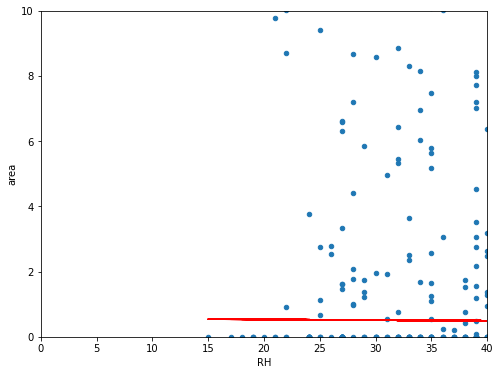

In [ ]:
df.plot(kind='scatter', x='RH', y='area', figsize=(8, 6))

plt.axis([0, 40, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [ ]:
x_train.shape

(413, 1)

In [ ]:
x_test.shape

(104, 1)

In [ ]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.5682677]
Slope : [[-0.00181982]]


**Linear Model:** Area Burned = .568 + -.0018*RH

In [ ]:
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)


print('R2 score:', r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.002807391126103842
Mean squared error: 0.33473677752428593


Wind

In [ ]:
x = df['wind'].values.reshape(-1,1)
y = df['correct_area'].values.reshape(-1,1)

lm.fit(x, y)

t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.39130227060318623, 0.022702621810896988)

**Linear Model:** Area Burned = .3913 + .0227*Wind

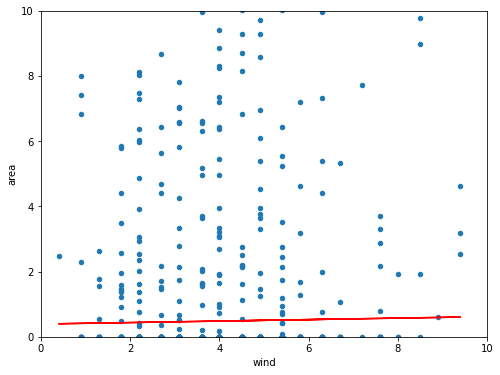

In [ ]:
df.plot(kind='scatter', x='wind', y='area', figsize=(8, 6))

plt.axis([0, 10, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [ ]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.39716962]
Slope : [[0.02255892]]


**Linear Model:** Area Burned = 0.397 + 0.0225* Wind



In [ ]:
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)


print('R2 score:', r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.0023451377048031574
Mean squared error: 0.33489194636455694


Rain

In [ ]:
x = df['rain'].values.reshape(-1,1)
y = df['correct_area'].values.reshape(-1,1)

lm.fit(x, y)

t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.48147604987363146, 0.047836775053030425)

**Linear Model:** Area Burned = 0.481 + 0.0478* Rain




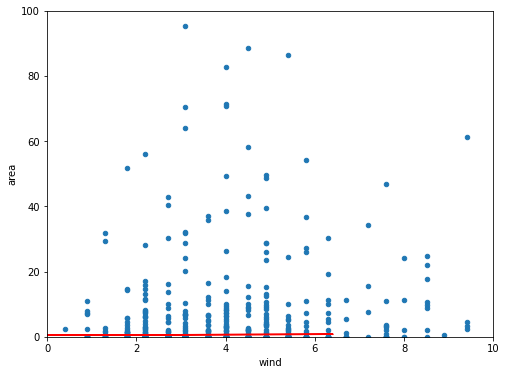

In [ ]:
df.plot(kind='scatter', x='wind', y='area', figsize=(8, 6))

plt.axis([0, 10, 0, 100])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [ ]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.48714565]
Slope : [[0.05310546]]


**Linear Model**: Area Burned = 0.487 + 0.0531*Rain

In [ ]:
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)


print('R2 score:', r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.0033158753354052273
Mean squared error: 0.33679223046788803


Final Results    |  R2           |        Mean Squared Error

---
 
Temp             |  -0.004574997224866095    |    0.33721489144635675  

---

RH               | 0.002807391126103842 | 0.33473677752428593

---

Wind            | 0.0023451377048031574 |  0.33489194636455694

---
Rain            |  -0.0033158753354052273 | 0.33679223046788803


When looking at the table above we see that the mean squared error for all the models are very close to zero. The closer the mean squared error is to zero the better the model predicts the data. However, the R2 for most the models were low and far from 1. The closer the R2 is to one the more accurate the model is. When looking at the R2, we can say that linear regression may not be the best approach for this dataset.